### IS407 Final Project
#### Cluster and Classify NBA Player Roles
##### Group Member: Shu Chen, Eric Xu, Xing Fan



In [107]:
# Read in the dataset:
import pandas as pd
df = pd.read_csv("IS407 Final Project Data - 24-25 NBA Player Data.csv")
# Dataset showcase:
df.head()

,Player,Team,Age,Pos,Height,Weight,GP,PTS,REB,AST
0,Bogdan Bogdanović,ATL,32,SG / SF,6-5,225.0,24,10.0,2.8,2.0
1,Caris LeVert,ATL,30,SG / SF,6-6,205.0,26,14.9,3.7,2.9
2,Clint Capela,ATL,31,C,6-10,256.0,55,8.9,8.5,1.1
3,Daeqwon Plowden,ATL,26,SG / SF,6-6,216.0,6,7.2,1.8,0.3
4,David Roddy,HOU,24,SF / PF,6-4,255.0,27,4.5,2.6,1.1


Data Preparation:
1. We want to check if there are any missing values. If found, we will start to clean the data. In our case, there are two observations were identified as missing values. We are going to delete them.
2. We will transform  unit of 'height' from inch to cm.
3. We want to check duplicated  observations if exists.

In [109]:
# Check missing values:
df.isnull().sum()

Player    0
Team      0
Age       0
Pos       0
Height    0
Weight    2
GP        0
PTS       0
REB       0
AST       0
dtype: int64

In [110]:
# Remove and check if all missing values have been removed:
df = df.dropna(subset=["Weight"])
df.isnull().sum()

Player    0
Team      0
Age       0
Pos       0
Height    0
Weight    0
GP        0
PTS       0
REB       0
AST       0
dtype: int64

In [111]:
# unit transformation:
def height_to_cm(height_str):
    """
    Convert height like '6-5' into centimetres (int).
    Example: '6-5' → 195 cm
    """
    feet, inches = map(int, height_str.split('-'))
    total_inches = feet * 12 + inches
    cm = round(total_inches * 2.54)
    return cm

df["Height"] = df["Height"].apply(height_to_cm)
print(df[['Player', 'Height']].head())

              Player  Height
0  Bogdan Bogdanović     196
1       Caris LeVert     198
2       Clint Capela     208
3    Daeqwon Plowden     198
4        David Roddy     193


In [112]:
df_copy = df.copy()

In [113]:
# Check if there are duplicated observations:
# count how many duplicated players are in the list
duplicate_players = df.groupby('Player')['Team'].count()
duplicate_players = duplicate_players[duplicate_players > 1].sort_values(ascending=False)


print(f"has {len(duplicate_players)} number of players who have transferred (two or more times) this season.")
print(f"Total number of duplicated observations：{duplicate_players.sum()}")
print("\n The specific list of players and their appearances.：")
print(duplicate_players)

has 95 number of players who have transferred (two or more times) this season.
Total number of duplicated observations：202

 The specific list of players and their appearances.：
Player
Josh Okogie            3
Cody Martin            3
Vasilije Micic         3
Nick Richards          3
MarJon Beauchamp       3
                      ..
Bogdan Bogdanović      2
Jared Butler           2
Jalen Hood-Schifino    2
Jake LaRavia           2
AJ Johnson             2
Name: Team, Length: 95, dtype: int64


For these duplicate records, we decided to retain the record with the most appearances for that player's team to ensure the representativeness of the data.

In [115]:
# Cleaning data:
print(f"Total observations before cleaning: {len(df)}")

# Sort by GP (number of appearances) in descending order.
df = df.sort_values(by='GP', ascending=False)

# Remove duplicates from the Player column and keep the first one (the one with the highest GP).
df_clean = df.drop_duplicates(subset=['Player'], keep='first').copy()

# Reset Index
df_clean = df_clean.reset_index(drop=True)

print(f"Cleaning finished! {len(df_clean)} number of players in total")
df_clean.head(10)

df = df_clean.copy()
df.head()

Total observations before cleaning: 657
Cleaning finished! 550 number of players in total


,Player,Team,Age,Pos,Height,Weight,GP,PTS,REB,AST
0,Harrison Barnes,SAS,33,SF / PF,203,225.0,82,12.3,3.8,1.7
1,Malik Beasley,DET,28,SG,193,187.0,82,16.3,2.6,1.7
2,Jaden McDaniels,MIN,24,PF / SF,206,185.0,82,12.2,5.7,2.0
3,Jalen Green,HOU,23,SG,193,186.0,82,21.0,4.6,3.4
4,Jarrett Allen,CLE,27,C,206,243.0,82,13.5,9.7,1.9


In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features for correlation
numeric_df = df.select_dtypes(include=["int64", "float64"])

# correlation matrix
corr_matrix = numeric_df.corr()

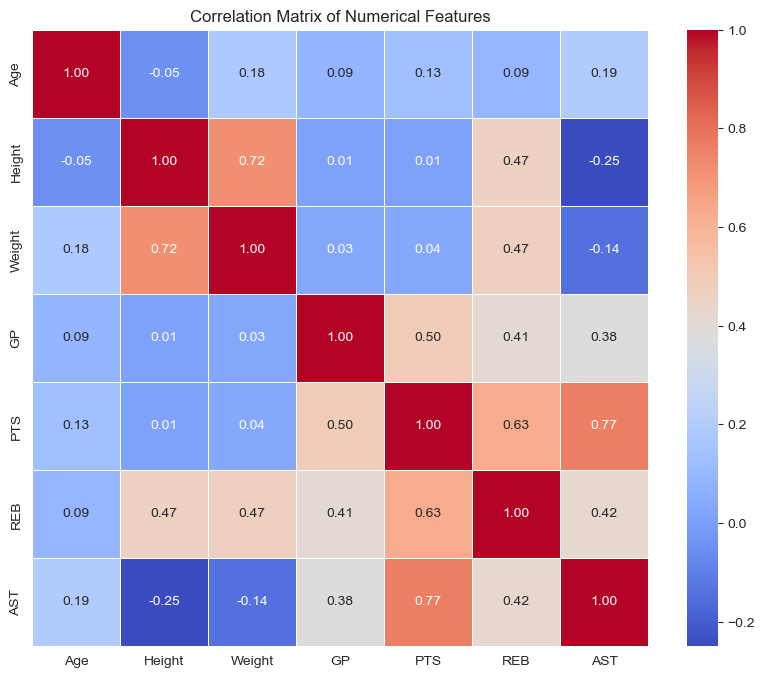

In [117]:
# Heatmap Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            square=True,
            linewidths=.5,
            cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


C:\Users\xk200\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\xk200\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\xk200\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\xk200\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

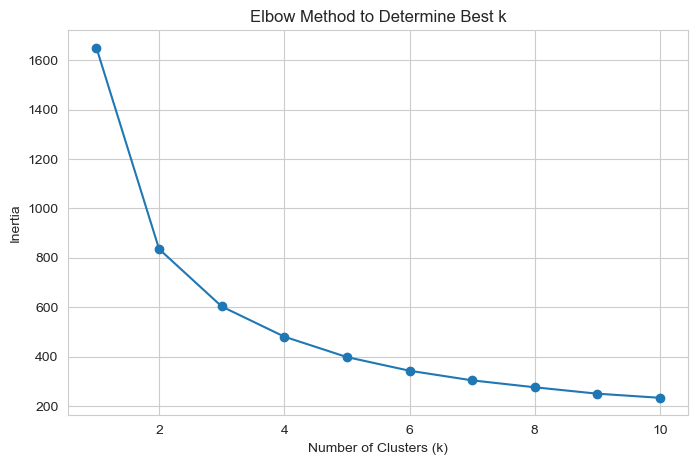

C:\Users\xk200\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Raw Cluster Stats (by ID):
                   PTS       REB       AST
Cluster_ID                               
0            9.326316  3.796651  2.145455
1           20.739706  5.098529  5.710294
2            3.343256  1.649767  0.816279
3           14.056897  8.368966  2.398276

Auto-assigned Cluster Mapping: {1: 'Scoring Playmaker', 3: 'Rebounding Big', 0: 'Role Player', 2: 'Bench Player'}

Final Cluster Characteristics:
                         PTS       REB       AST
Player_Cluster                                  
Bench Player        3.343256  1.649767  0.816279
Rebounding Big     14.056897  8.368966  2.398276
Role Player         9.326316  3.796651  2.145455
Scoring Playmaker  20.739706  5.098529  5.710294


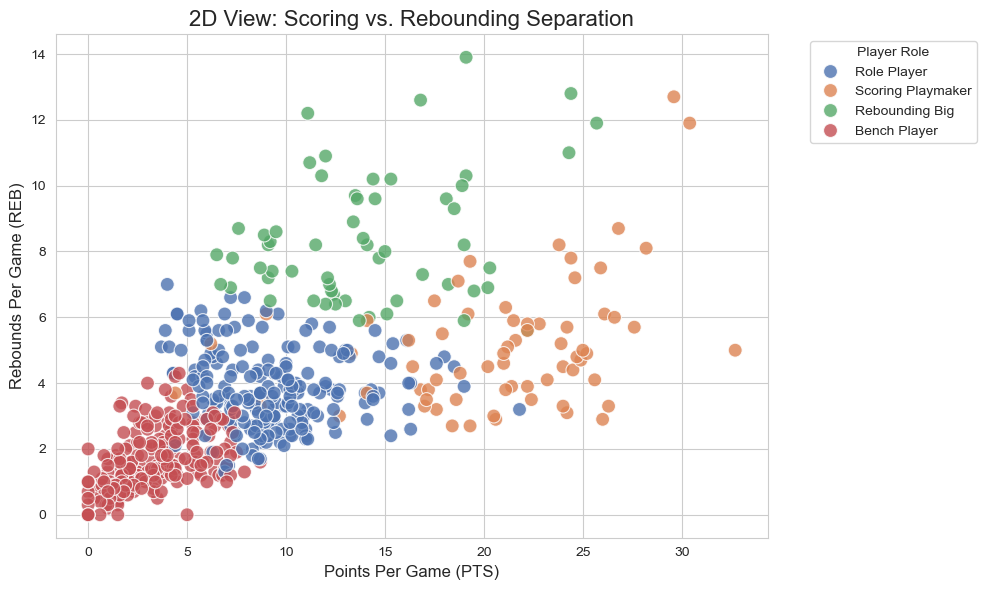

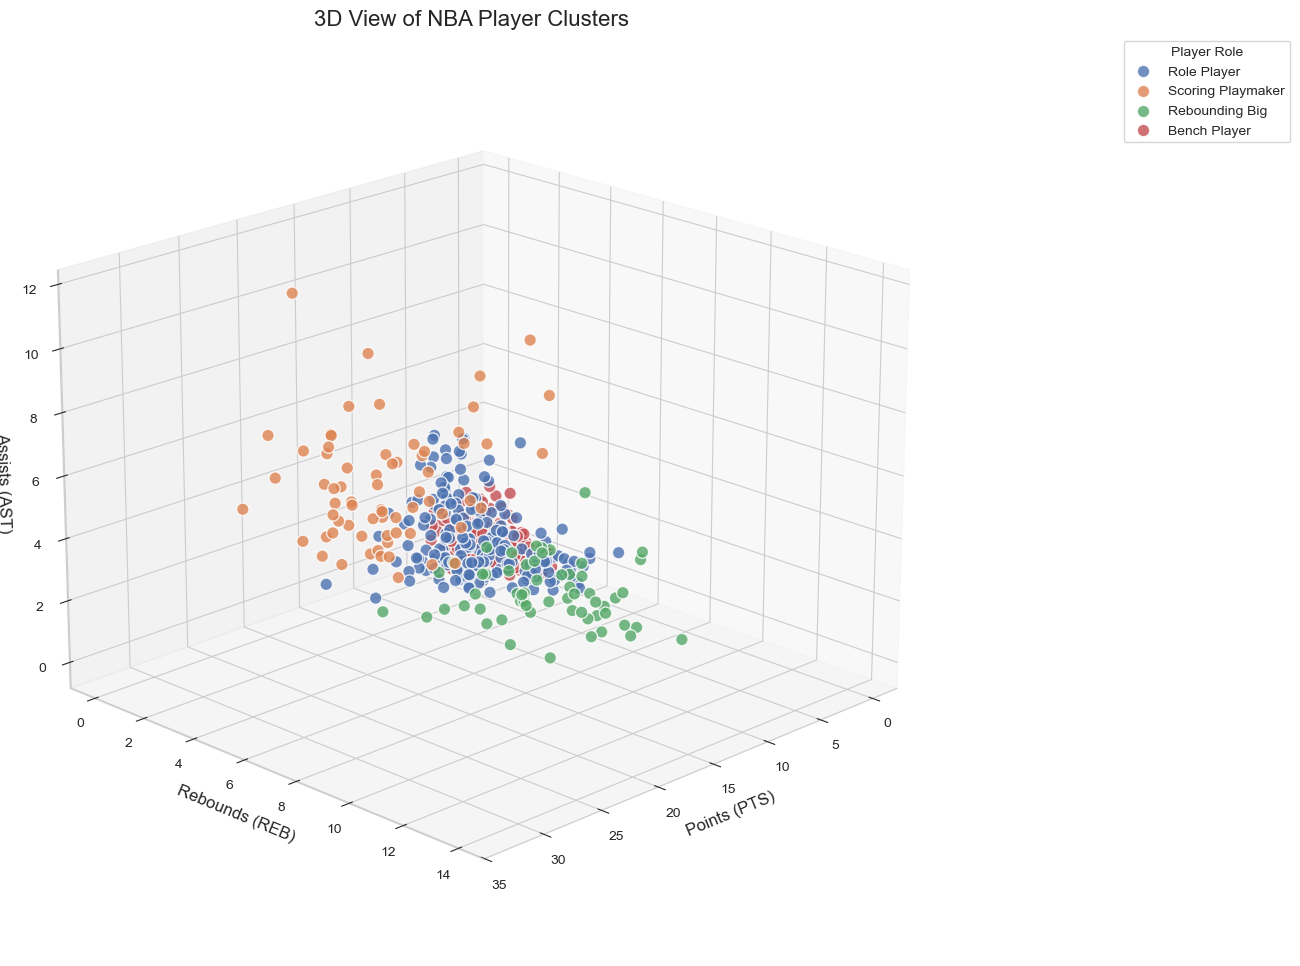

In [118]:
# STAGE 1 — K-Means Clustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  

# Select features
features = ["PTS", "REB", "AST"]
X = df[features].copy()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
inertia_list = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_list, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Best k")
plt.grid(True)
plt.show()

# Fit K-Means using chosen k
k = 4  
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Store the raw Cluster ID first
df["Cluster_ID"] = clusters

# Calculate the average data for each numeric ID.
cluster_stats = df.groupby("Cluster_ID")[features].mean()
print("Raw Cluster Stats (by ID):\n", cluster_stats)


# Name the cluster "Scoring Playmaker" which has highest avg PTS
id_scoring = cluster_stats["PTS"].idxmax()

# Name the cluster "Bench Player" which has lowest avg PTS
id_bench = cluster_stats["PTS"].idxmin()

# Compare REB for the rest clusters
remaining_ids = [i for i in range(k) if i not in [id_scoring, id_bench]]
id_1 = remaining_ids[0]
id_2 = remaining_ids[1]

if cluster_stats.loc[id_1, "REB"] > cluster_stats.loc[id_2, "REB"]:
    id_big = id_1
    id_role = id_2
else:
    id_big = id_2
    id_role = id_1


cluster_names = {
    id_scoring: "Scoring Playmaker", 
    id_big:     "Rebounding Big",    
    id_role:    "Role Player",       
    id_bench:   "Bench Player"      
}

print("\nAuto-assigned Cluster Mapping:", cluster_names)

df["Player_Cluster"] = df["Cluster_ID"].map(cluster_names)

# Show final cluster characteristics
print("\nFinal Cluster Characteristics:")
print(df.groupby("Player_Cluster")[["PTS", "REB", "AST"]].mean())

# Visualization the clusters with 2D Scatter plot

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,               
    x="PTS",
    y="REB",
    hue="Player_Cluster",   
    palette="deep",
    s=100,
    alpha=0.8,
    edgecolors='w'
)

plt.title("2D View: Scoring vs. Rebounding Separation", fontsize=16)
plt.xlabel("Points Per Game (PTS)", fontsize=12)
plt.ylabel("Rebounds Per Game (REB)", fontsize=12)


plt.legend(title="Player Role", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization the clusters with 3D Scatter plot

sns.set_style("whitegrid")
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')



clusters = df["Player_Cluster"].unique()
colors = sns.color_palette("deep", n_colors=len(clusters))

for cluster, color in zip(clusters, colors):
    subset = df[df["Player_Cluster"] == cluster]
    ax.scatter(
        subset["PTS"], 
        subset["REB"], 
        subset["AST"], 
        c=[color], 
        label=cluster, 
        s=80,       
        alpha=0.8,  
        edgecolors='w'
    )

ax.set_xlabel('Points (PTS)', fontsize=12)
ax.set_ylabel('Rebounds (REB)', fontsize=12)
ax.set_zlabel('Assists (AST)', fontsize=12)
ax.set_title('3D View of NBA Player Clusters', fontsize=16)
ax.legend(title="Player Role", bbox_to_anchor=(1.2, 1), loc='upper left')

ax.view_init(elev=20, azim=45) 

plt.tight_layout()
plt.show()

To determine the number of clusters for our K-means model, we used the Elbow Method, which plots how inertia (the total within-cluster variation) changes as K increases. We tested K from 1 to 10 and examined where the improvement in inertia begins to slow down. In our plot, the inertia dropped sharply from K = 1 to K = 2 and again from K = 2 to K = 3, meaning the model benefited a lot from adding those clusters. There was still a noticeable improvement going from K = 3 to K = 4, but after K = 4 the curve flattened significantly. The drop from K = 4 to K = 5 was much smaller, and the decreases from K = 5 through K = 10 were minimal. This flattening indicates the “elbow,” which represents the point where adding more clusters no longer meaningfully improves the model. Based on this clear bend in the curve, we determined that K = 4 is the optimal choice. It provides enough separation to capture different types of NBA players without overfitting or creating unnecessary clusters.

Features used: ['Height', 'Weight', 'Age', 'Pos_code']
   Height  Weight  Age  Pos_code     Player_Cluster
0     203   225.0   33         3        Role Player
1     193   187.0   28         2        Role Player
2     206   185.0   24         4        Role Player
3     193   186.0   23         2  Scoring Playmaker
4     206   243.0   27         5     Rebounding Big
Decision Tree Accuracy: 0.42424242424242425

Classification Report:
                    precision    recall  f1-score   support

     Bench Player       0.45      0.38      0.41        65
   Rebounding Big       0.35      0.47      0.40        17
      Role Player       0.44      0.59      0.50        63
Scoring Playmaker       0.00      0.00      0.00        20

         accuracy                           0.42       165
        macro avg       0.31      0.36      0.33       165
     weighted avg       0.38      0.42      0.40       165



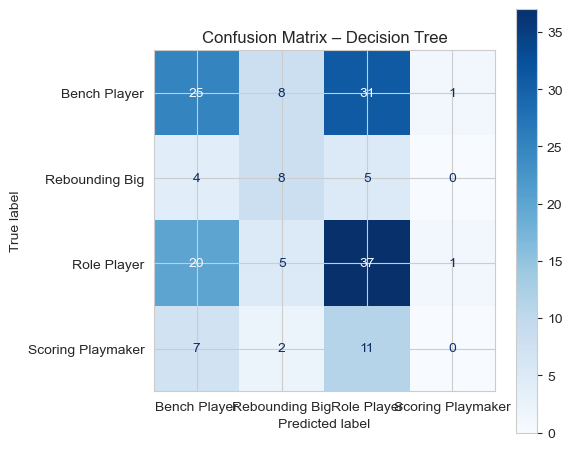

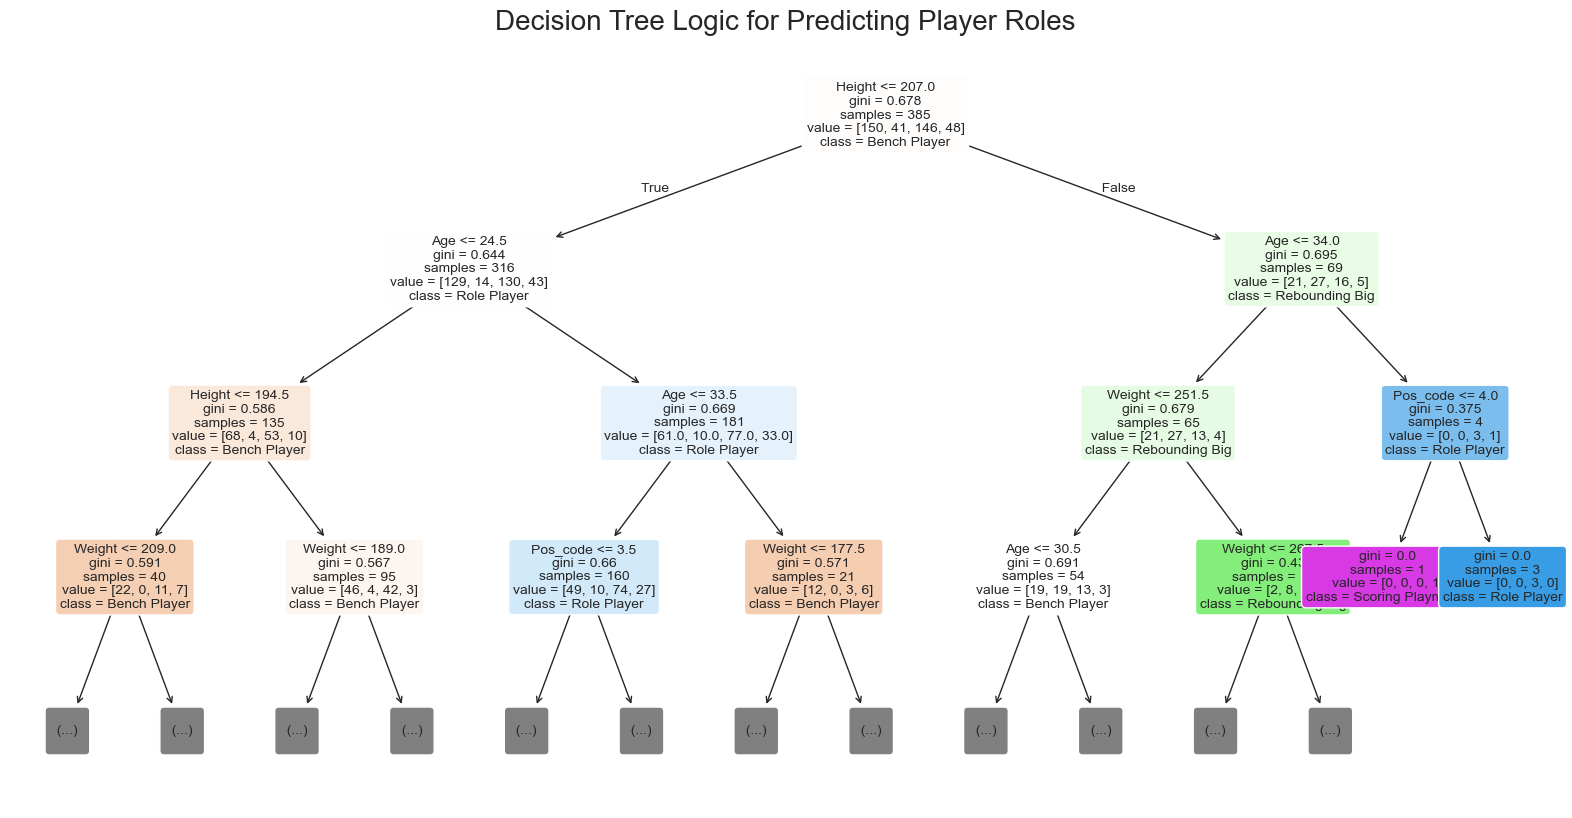

In [120]:
# STAGE 2: Classification -- Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Clean & encode position (1–5) 
def keep_first_pos(pos):
    """Take only the first position if a player has multiple: 'SG-SF' -> 'SG'."""
    if pd.isna(pos):
        return None
    return str(pos).replace("/", "-").split("-")[0].strip()

df["Main_Pos"] = df["Pos"].apply(keep_first_pos)

# fixed NBA position encoding based on 1–5 roles:
pos_mapping = {
    "PG": 1,
    "SG": 2,
    "SF": 3,
    "PF": 4,
    "C": 5
}

df["Pos_code"] = df["Main_Pos"].map(pos_mapping)

# Drop rows with missing/invalid positions
df = df.dropna(subset=["Pos_code"])

# Build feature dataset 
numeric_features = ["Height", "Weight", "Age", "Pos_code"]
target_col = "Player_Cluster"  

df_model = df[numeric_features + [target_col]].copy()

print("Features used:", numeric_features)
print(df_model.head())

X = df_model.drop(columns=[target_col])
y = df_model[target_col]

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Decision Tree classifier 
clf = DecisionTreeClassifier(
    max_depth=5,      
    random_state=42
)

clf.fit(X_train, y_train)

# Evaluation 
y_pred = clf.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ===== Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6, 5))
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt,
                                 display_labels=clf.classes_)
disp_dt.plot(ax=ax, values_format="d", cmap="Blues")
ax.set_title("Confusion Matrix – Decision Tree")
plt.tight_layout()
plt.show()

# Visualization - Decision Tree structure
plt.figure(figsize=(20, 10))
plot_tree(
    clf, 
    feature_names=numeric_features,  
    class_names=clf.classes_,
    filled=True, 
    rounded=True, 
    fontsize=10,
    max_depth=3  
)

plt.title("Decision Tree Logic for Predicting Player Roles", fontsize=20)
plt.show()

KNN Accuracy: 0.3575757575757576

Classification report:
                    precision    recall  f1-score   support

     Bench Player       0.35      0.42      0.38        65
   Rebounding Big       0.40      0.35      0.38        17
      Role Player       0.40      0.40      0.40        63
Scoring Playmaker       0.10      0.05      0.07        20

         accuracy                           0.36       165
        macro avg       0.31      0.30      0.30       165
     weighted avg       0.34      0.36      0.35       165



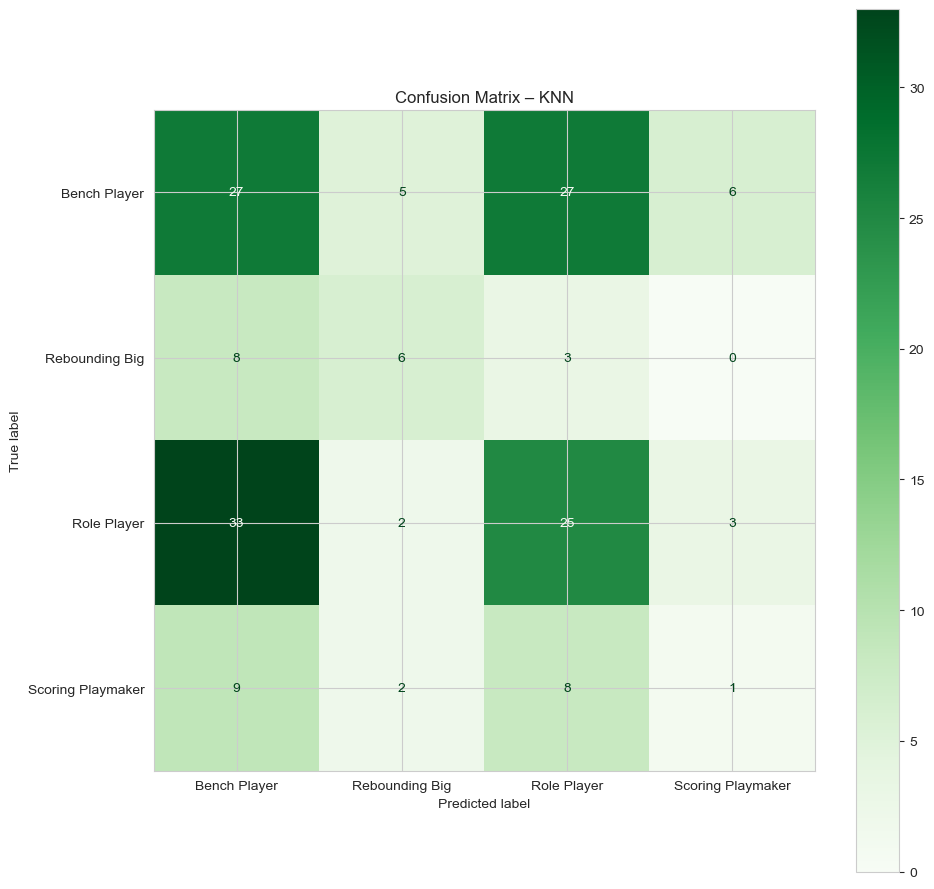

In [121]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN classifier 
knn = KNeighborsClassifier(n_neighbors=3)   
knn.fit(X_train_scaled, y_train)

# Evaluation 
y_pred = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

# Confusion Matrix – KNN 
cm_knn = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 9))
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                                  display_labels=knn.classes_)
disp_knn.plot(ax=ax, values_format="d", cmap="Greens")
ax.set_title("Confusion Matrix – KNN")
plt.tight_layout()
plt.show()


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=3,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Confusion Matrix – Random Forest
cm_rf = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 9))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                                 display_labels=rf.classes_)
disp_rf.plot(ax=ax, values_format="d", cmap="Oranges")
ax.set_title("Confusion Matrix – Random Forest")
plt.tight_layout()
plt.show()

# Visualization
importances = rf.feature_importances_
feature_names = X.columns

feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 9))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_imp_df, palette='viridis', legend=False)

plt.title("Random Forest Feature Importance\n(Which attribute defines a player's role most?)", fontsize=15)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()
